# Homework 2

### Due: Saturday Sep 18, at 11:59pm via Blackboard

A car dealership wants to understand their customers and their buying habbits. The data (`cardealership.csv`) represents a randsome sample of their sales. 

|**VARIABLE**|**DESCRIPTION**|
|------------|---------------|
| **Gender** | gender for customer |
| **marital status** | is the customer 'Married' or 'Single'? |
| **age** | age of the customer |
| **country** | country make of the car |
| **size** |  the size of the car they bought ('Small', 'Medium', 'Large') |
| **type** | the type of the car they bought ('Family', 'Sporty', 'work') |

1. (1 point) Select all the married customers in the given dataset, and save it in a variable (`married_customers`). What is the percentage of married customers in the sample?

In [18]:
import numpy as np
import pandas as pd

cardealership = pd.read_csv('cardealership.csv')
cardealership.count()

Gender            303
marital status    303
age               303
country           303
size              303
type              303
dtype: int64

In [2]:
married_customers = cardealership[cardealership['marital status'] == 'Married']
print(f'The percentage of married customers in the sample is {round(len(married_customers.index)/len(cardealership.index)*100,2)}.')

The percentage of married customers in the sample is 64.69.


2. (1 point) Use a list comprehension to create a list with two age categories. The category is `Below or equal to 30` if `age <= 30`, otherwise the category is `Above 30`. Use the result from this question to compute the number of customers in each category.

In [3]:
cust_age = ['Below or equal to 30' if i <= 30 else 'Above 30' for i in cardealership['age']]

pd.DataFrame(cust_age).value_counts()

Below or equal to 30    159
Above 30                144
dtype: int64

3. (2 points) The current version of `Pandas` has 142 methods including (`DataFrame()`, `Series()`, `value_counts()`, etc.). In this question, you are expected to learn about the `cut()` method which allows you to categorize a numerical vector into user-defined categories. [Click here](https://pandas.pydata.org/docs/reference/api/pandas.cut.html) to learn more about the `cut` method.

    - Use the `cut()` method to categorize the `age` variable into three buckets: `(0,30]`, `(30, 34]`, and `(34,60]`. (For this exercise, you don't have to add the new column to the original dataframe. You can save it in a seperate variable instead)
    - Rename the labels of the buckets to the ones shown in the table below.  
    - How many element are there in each category? 



<center> 

|bucket | label |
|-------|-------|
|(0,30] | Below 30 | 
|(30, 34]| Between 30 and 34|
|(34,60]| Above 34|

<center>




In [4]:
age_segment = pd.cut(cardealership['age'],(0, 30, 34, 60),labels= ['Below 30', 'Between 30 and 34', 'Above 34'])

age_segment.value_counts()

Below 30             159
Above 34              76
Between 30 and 34     68
Name: age, dtype: int64

4. (1 point) `Pandas` has another method called `qcut`, which allows you to categorize a numerical variable into equal-sized buckets based on quantiles. Use the `qcut()` method to categorize `age` into quartiles (4 buckets). [Click here](https://pandas.pydata.org/docs/reference/api/pandas.qcut.html) to learn more about the `cut` method

In [5]:
age_quartiles = pd.qcut(cardealership['age'],4)

age_quartiles.value_counts()

(17.999, 26.0]    85
(34.5, 60.0]      76
(26.0, 30.0]      74
(30.0, 34.5]      68
Name: age, dtype: int64

5. (1 point) Using `pandas`, summarize the customer characteristics: `Gender`, `marital status` (using relative frequency tables) and `age` (using the `describe()` method). 

In [6]:
cardealership["Gender"].value_counts(normalize=True)*100

Male      54.455446
Female    45.544554
Name: Gender, dtype: float64

In [7]:
cardealership["marital status"].value_counts(normalize=True)*100

Married    64.686469
Single     35.313531
Name: marital status, dtype: float64

In [8]:
cardealership["age"].describe()

count    303.000000
mean      30.719472
std        5.984294
min       18.000000
25%       26.000000
50%       30.000000
75%       34.500000
max       60.000000
Name: age, dtype: float64

6. (1 point) Using `pandas`, summarize the data on the cars sold: `country`, `size`, and `type` (using relative frequency tables).

In [16]:
cardealership["country"].value_counts(normalize=True)*100

Japanese    48.844884
American    37.953795
European    13.201320
Name: country, dtype: float64

In [10]:
cardealership["size"].value_counts(normalize=True)*100

Small     45.214521
Medium    40.924092
Large     13.861386
Name: size, dtype: float64

In [11]:
cardealership["type"].value_counts(normalize=True)*100

Family    51.155116
Sporty    33.003300
Work      15.841584
Name: type, dtype: float64

7. (1 point) Write a summary paragraph describing the customers and cars sold data. Round all numbers in this paragraph to nearest integers.

From the given data, slightly more than half of the customers are male which is 55%, another 45% portion is female customers. The majority of customers are married(65%). The age of customers is almost normally distributed, mean and median are almost equal around 30. However, 5 in standard deviation can imply that the age is slightly varied. For the cars sold, Japanese cars account for half of the portion, following by American cars(38%) and European cars(13%) consecutively. This pattern can be observed for the car's type. Half of the cars sold are Family cars. Another half is occupied by Sporty cars(33%) and Work cars(15%), consequently. The car's size information is slightly different. Small and medium cars are the majority of the car sold, almost 45% each, while large cars are sold for only 13%.

8. (2 points) Create a bargraph that shows the distribution of car `type`. Your bargraph should be similar to the attached bargraph picture on blackboard ('CarsTypeDistribution.png'). In particular, make sure to:

- Use default matplotlib plot style
- Use % for the labels of the y-axis ticks
- Use `lightgrey` for the bars color
- Overlay a horizontal line (y=25). The line's style is "dashed", and the color is "blue"

In [12]:
import matplotlib.pyplot as plt
import math

In [13]:
# Default matplotlib plot style
type_sale = cardealership.type.value_counts(normalize=True)*100

type_sale

Family    51.155116
Sporty    33.003300
Work      15.841584
Name: type, dtype: float64

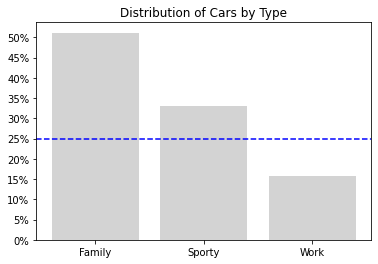

In [14]:
fig, ax = plt.subplots()

plt.bar(type_sale.index, type_sale, color= 'lightgrey')
plt.title('Distribution of Cars by Type')
plt.axhline(y= 25 ,ls = '--', color='blue')
plt.yticks(range(0,math.floor(max(type_sale)),5),[str(i)+'%' for i in range(0,math.floor(max(type_sale)),5)])

plt.show()